**EDA of Netflix Movies and TV Shows**

In [4]:
#importing Libaries
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df  = pd.read_csv('/content/netflix_titles.csv')

**Inspecting Dataset**


In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
df.shape #tells the rows and columns of dataset

(8807, 12)

In [9]:
df.describe() #basic stats (only of integer n float)

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df.info()  #shows us the count and datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
#drop_file =[]
#df = df.drop(drop_file, axis=1, inplace=True)

Missing Values

In [13]:
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum() #missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
#df.dropna(inplace=True)

In [16]:
#df.duplicated().sum()

In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Text(0.5, 0, 'Release Year')

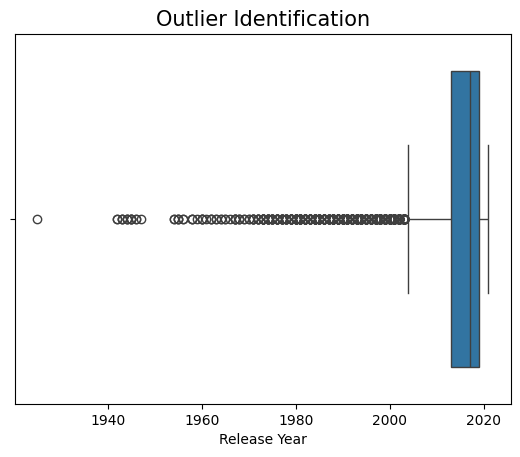

In [18]:
#Showing outliers in boxplot
sns.boxplot(x=df['release_year'])
plt.title('Outlier Identification', fontsize=15 )
plt.xlabel('Release Year', fontsize=10)

In [19]:
#Defining the Quartiles for removal of outliers
Q1=df['release_year'].quantile(0.25)
Q3=df['release_year'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((df['release_year']<lowoutlier)|(df['release_year']>highoutlier)).sum()
totaloutlier

719

In [20]:
df_filter=df[(df['release_year']<highoutlier)&(df['release_year']>lowoutlier)]
df_filter.describe()

,release_year
count,8024.000000
mean,2016.403664
std,3.637431
min,2005.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
#validating the removal of outlier
totaloutlier = ((df_filter['release_year'] < lowoutlier) | (df_filter['release_year'] > highoutlier)).sum()
print("Total Number of Outliers in the release_year are {}".format(totaloutlier))

Total Number of Outliers in the release_year are 0


Inspecting Missing Values


In [22]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Chceking the percentage is important


In [23]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [24]:
df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [25]:
df["director"].value_counts().head(10) #top 10 directors

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

**Movies Vs TVShows**


In [26]:
#Checking Gender imbalance
go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index,
                       values=df.type.value_counts(normalize=True).values, hole=.5,
                       title = 'Movies Vs Shows')])

In [27]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [28]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [29]:
df.country.value_counts().head()

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [30]:
df.country.value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

**Year Wise Count**


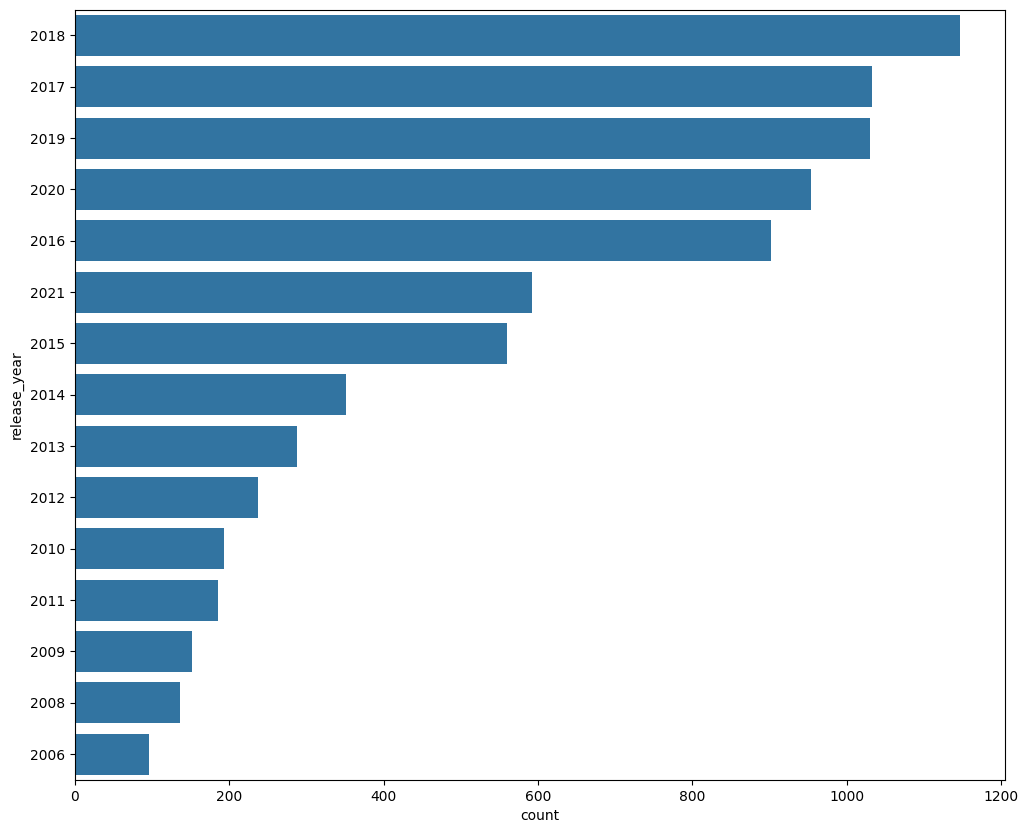

In [31]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=df, order=df.release_year.value_counts().index[0:15])

Highest Releases in 2018 followed by 2017 and 2019

In [32]:
#Top 10 Directors
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

In [33]:
df.listed_in.value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

In [34]:
df.listed_in.value_counts().tail()

Kids' TV, TV Action & Adventure, TV Dramas            1
TV Comedies, TV Dramas, TV Horror                     1
Children & Family Movies, Comedies, LGBTQ Movies      1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows    1
Cult Movies, Dramas, Thrillers                        1
Name: listed_in, dtype: int64

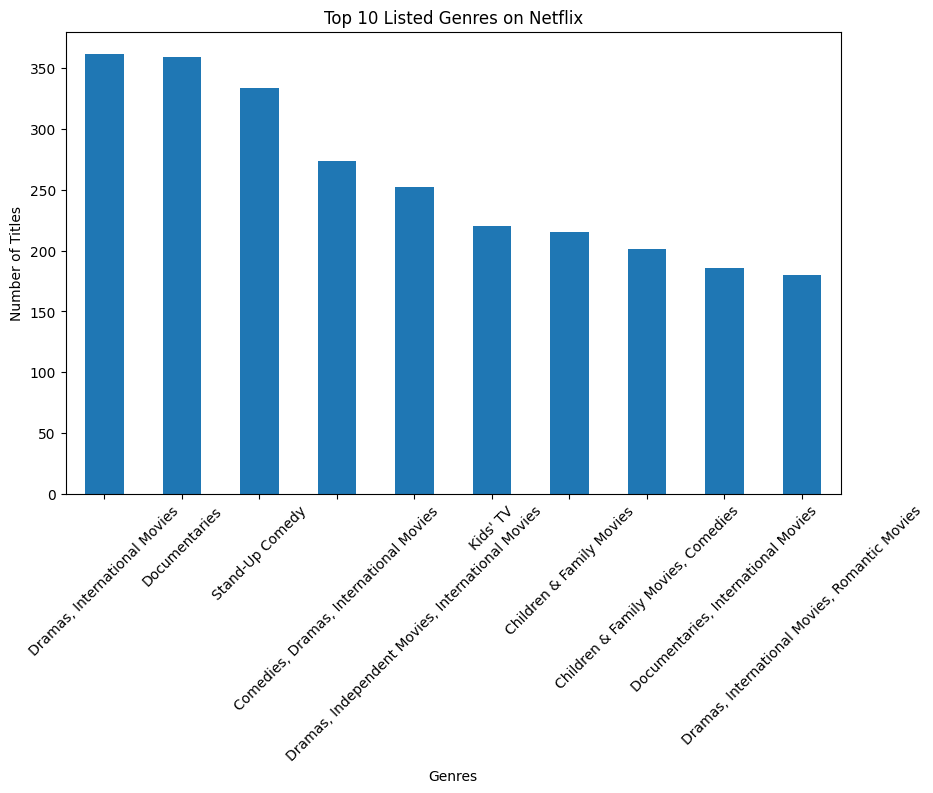

In [35]:
# Plotting top 10 listed genres
top_genres = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Listed Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

**Handling Missing Values**



In [36]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [37]:
round(df.isnull ().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [38]:
#Dropping rows for small percentages of null
df.dropna(subset=["rating","duration"],axis=0, inplace= True)

In [39]:
df.shape

(8800, 12)

In [40]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.90
country          9.43
cast             9.38
date_added       0.11
show_id          0.00
type             0.00
title            0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [41]:
df.dropna(subset=["date_added"],axis=0, inplace= True)

In [42]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.82
country          9.43
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [43]:
#replace missing values in country with"Unkonown"
df["country"].replace(np.NaN, "Unknown", inplace= True)

In [44]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.82
cast             9.39
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [45]:
df.country.value_counts().head()

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
Name: country, dtype: int64

In [46]:
df.cast.value_counts()

David Attenborough                                                                                                                               19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                          14
Samuel West                                                                                                                                      10
Jeff Dunham                                                                                                                                       7
David Spade, London Hughes, Fortune Feimster                                                                                                      6
                                                                                                                                                 ..
Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, Suhasini Mul

In [47]:
#replace missing values in Cast with "No Cast"
df["cast"].replace(np.NaN, "No Cast", inplace=True)

In [48]:
df["director"].replace(np.NaN, "No Director", inplace=True)


In [49]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [50]:
df['title']

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8790, dtype: object

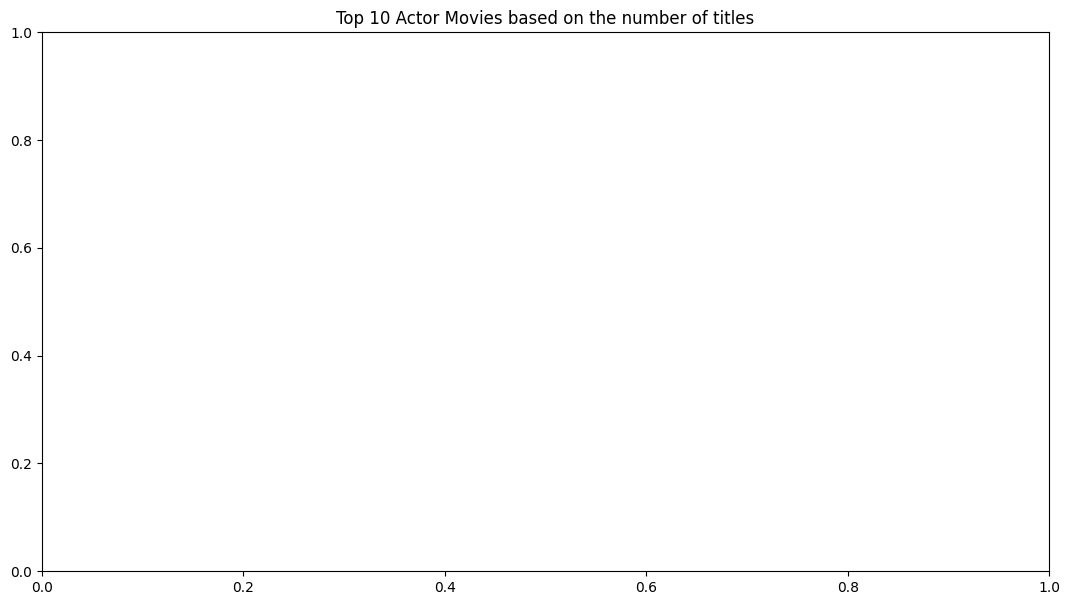

In [51]:
cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13, 7))
plt.title('Top 10 Actor Movies based on the number of titles')
sns.countplot( order=cast_shows.value_counts().index[:10], palette="pastel")
plt.show()

In [52]:
movies_df=df.loc[(df['type']=="Movie")]
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [53]:
show_df=df.loc[(df['type']=="TV Show")]
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [54]:
movies_df.duration= movies_df.duration.apply(lambda x:x.replace("min", "") if 'min' in x else x)
movies_df.head

<bound method NDFrame.head of      show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                               No Cast   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                               Unknown  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13      90    
6             2021     PG      91    
7             1993  TV-MA     125    
9             2021  PG-13     104    
12            2021  TV-MA     127    
...            ...    ...      ...   
8801          2015  TV-MA      96    
8802          2007      R     158    
8804          2009      R      88    
8805          2006     PG      88    
8806          2015  TV-14     111    

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

    

In [55]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   object
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.2+ KB


In [56]:
movies_df.loc[:,["duration"]]=movies_df.loc[:,["duration"]].apply(lambda x: x.astype('int64',errors='ignore'))
movies_df.describe()

,release_year,duration
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [57]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Visualization**

Correlation (Heat map)

[Text(0.5, 0, 'release_year')]

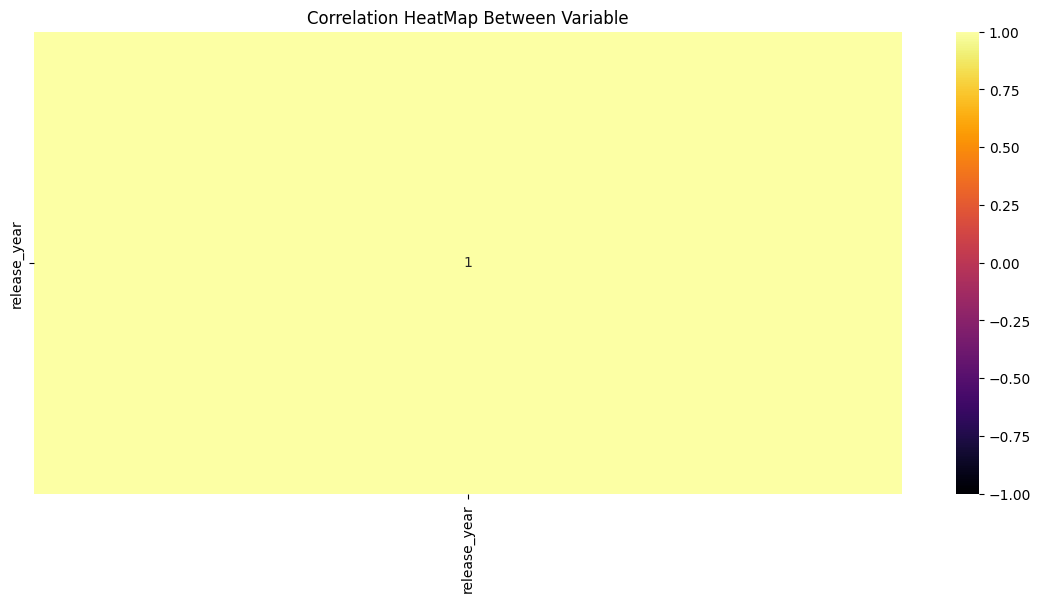

In [58]:
corr_df=df.drop(["listed_in", "description", "country"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g", vmin=-1, vmax=1, cmap="inferno", )
#here im setting annotation=True so this will write the data value in each cell
#fmt=.1g is a string formatting code to use when adding annootations, vmin and vmax are the values to anchor the color map otherwise they are import from the data and other color arguments
#cmap stands for color map, between multiple ive choosed inferno
# and finally ive set my line widths and line color
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

**Rating Type Distribution**

Text(0.5, 1.0, 'Count of content in different rating')

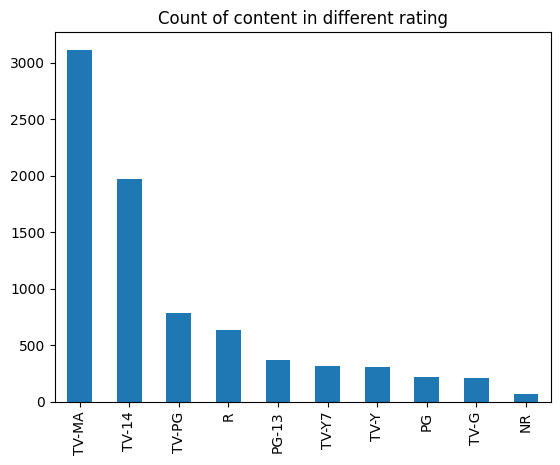

In [59]:
df_filter['rating'].value_counts()[:10].plot(kind='bar')
plt.title('Count of content in different rating')

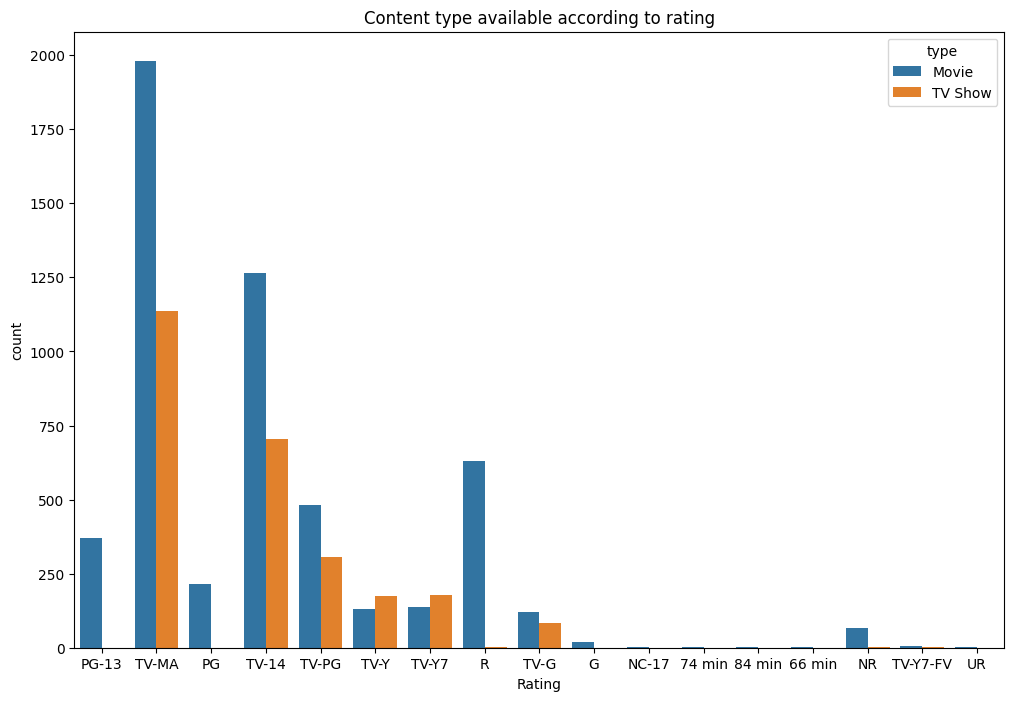

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_filter,x='rating', hue='type')
plt.title('Content type available according to rating')
plt.xlabel('Rating')
plt.show()

Here, we visualize the distribution of content ratings. This plot is essential to understand the target audience for Netflix content and how it aligns with the platform's content strategy.

Insight: Analyze the prevalence of different ratings (e.g., PG, R). A concentration of mature content might suggest targeting an older audience, while more family-friendly ratings indicate a broader target demographic.

This information can be beneficial to the industry leader in deciding the distribution of content in respect of the rating of viewers according to the available content. Additionally, it is helpful for people to analyse the movies and tv shows content in respect of the rating they got from the authorized certification committee.


**Movie and TV show duration analysis**

In [61]:
#Movie duration analysis
df_filter[df_filter['type']=="Movie"]['duration'].value_counts().sort_values(ascending=False)[:20]

90 min     142
97 min     137
91 min     136
93 min     131
94 min     125
95 min     124
92 min     124
96 min     117
102 min    110
98 min     109
99 min     106
88 min     103
103 min    100
100 min     99
106 min     99
101 min     98
86 min      98
87 min      96
107 min     93
89 min      91
Name: duration, dtype: int64

In [62]:
#TV shows season analysis
df_filter[df_filter['type']=="TV Show"]['duration'].value_counts().sort_values(ascending=False)

1 Season      1744
2 Seasons      417
3 Seasons      198
4 Seasons       89
5 Seasons       61
6 Seasons       29
7 Seasons       18
8 Seasons       16
9 Seasons        8
10 Seasons       4
13 Seasons       3
15 Seasons       2
12 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

Text(0.5, 1.0, 'Count of TV shows in different seasons')

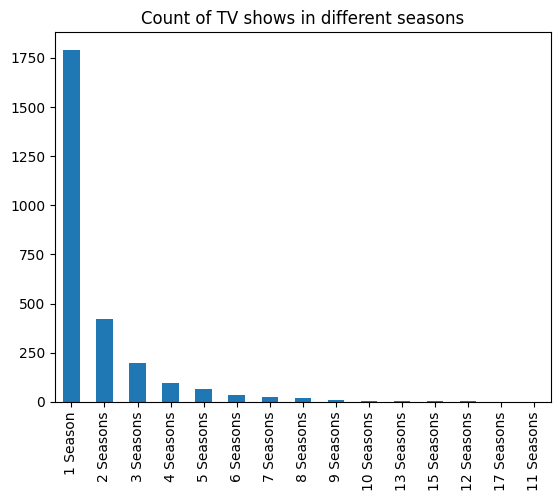

In [63]:
df[df['type']=="TV Show"]['duration'].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title('Count of TV shows in different seasons')

**Identifying most similar content in Netflix**

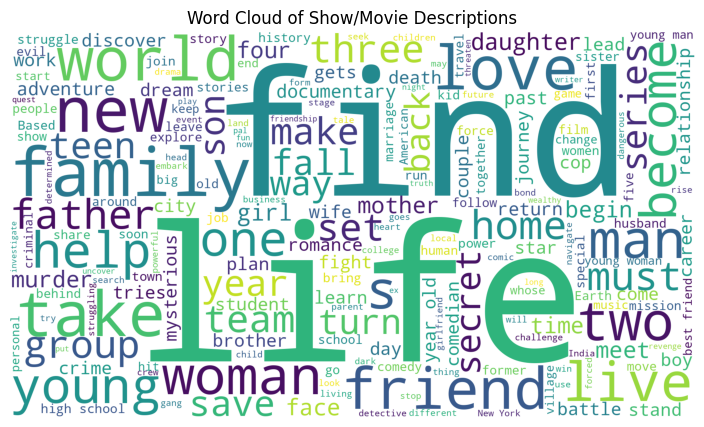

In [64]:
from wordcloud import WordCloud
plt.subplots(figsize=(10,5))
wordcloud=WordCloud(width=1920,
                   height=1080,
                   background_color='white').generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Show/Movie Descriptions')
plt.show()

**Content availibility in different countries¶**

Text(0.5, 1.0, 'Count of content in different countries')

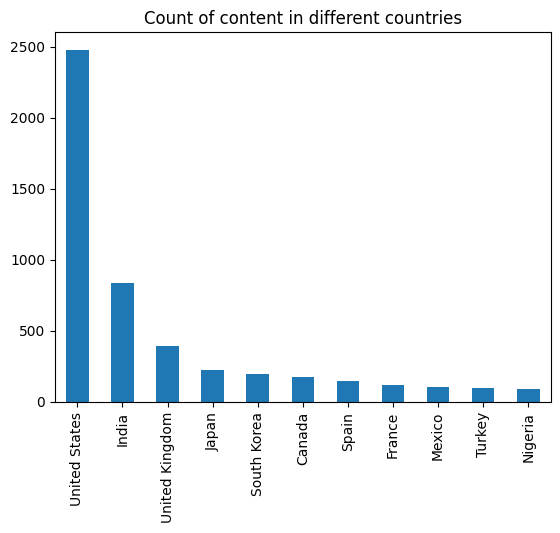

In [65]:
df_filter['country'].value_counts()[:11].plot(kind='bar')
plt.title('Count of content in different countries')

In [66]:
# filter out 'No Data'
df_top10=df_filter.query('country == ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Mexico","Turkey"]')

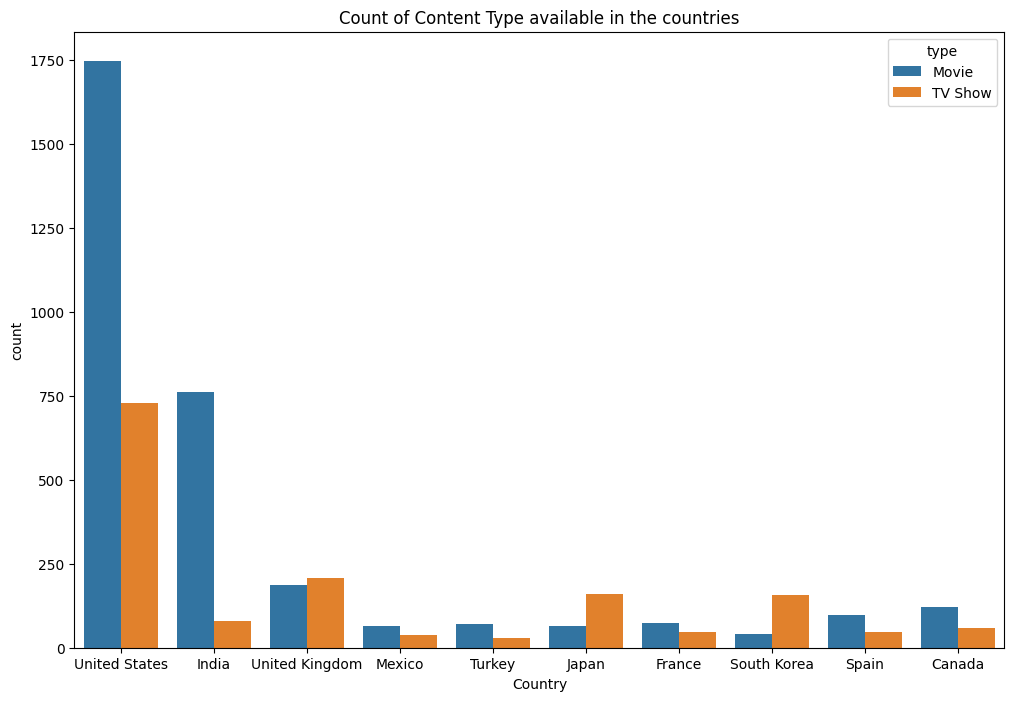

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_top10,x='country', hue='type')
plt.title('Count of Content Type available in the countries')
plt.xlabel('Country')
plt.show()

The above plot represents the content according to their types, it can be inference that Japan, South Korea and the United Kingdom are the only countries in which TV shows have more content than movies; it can be thought of as the people tend to watch more TV shows than movies in these countries. In contrast, the content available on Netflix is majorly movies.


